In [ ]:
%matplotlib inline 

In [1]:
import sys
sys.version

'3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:46) \n[GCC 9.4.0]'

# import

In [3]:
import os,sys

os.chdir("/home/jovyan/LateralSDE/codes/")
from RequiredModules import *

ROOT = "/home/jovyan/"

figspath = "/home/jovyan/LateralSDE/figs/p63f10/"
dataspath = "/home/jovyan/LateralSDE/datas/p63f10/"


os.chdir("/home/jovyan/")
#import LateralSDE.codes.sde_lateral as sdelat
#import LateralSDE.codes.behaviors_cf as cf
#import LateralSDE.codes.VehicleModel as VM
#import LateralSDE.codes.Bridge as BG
#import LateralSDE.codes.TwoDimMixedCAV as twodim
import LateralSDE.codes.HCM_adjustment_factor as CAF
#os.chdir("/home/qhs/Desktop/")
#import Deadlock2D.codes.av_idm_sde as idmsde
#import Deadlock2D.codes.rajamani_sde as rajasde
#import LateralSDE.codes.PavementFatigueCompensation as pfc
#import LateralSDE.codes.FokkerPlanckControl as fpc

In [4]:
reload(CAF)

<module 'LateralSDE.codes.HCM_adjustment_factor' from '/home/jovyan/LateralSDE/codes/HCM_adjustment_factor.py'>

# HCM CAF (capacity adjustment factor)

In [143]:
reload(CAF)

<module 'LateralSDE.codes.HCM_adjustment_factor' from '/home/jovyan/LateralSDE/codes/HCM_adjustment_factor.py'>

## Single lane simulation

In [5]:
reload(CAF)

<module 'LateralSDE.codes.HCM_adjustment_factor' from '/home/jovyan/LateralSDE/codes/HCM_adjustment_factor.py'>

In [6]:
reload(CAF)

road = CAF.SingleLaneSim()
two_dim_paras = {'alpha_roadbounds': .1 , 'beta_lane_marks':3.6, 'beta_lane_middle_line': 1.0, \
    'sigma_long':.1, 'sigma_lat':.1, 'sigma_long_drift':1.0, 'sigma_lat_drift':1.0, 'theta_ou':.1, \
            'amplyfier_bound': 1.0, 'amplyfier_lane_mark': 1.0,  'amplyfier_intra_lanes_long': 1e-6, 'amplyfier_intra_lanes_lat':1e-9}
#
states = road.sim_insert_all_vehs_at_once(T_horizon_sec = 300, deltat_sec = .2, desired_density = 100, \
                                          stochastic_proecess_name = 'OU', two_dim_paras = two_dim_paras)

(-0.1, 3.8)

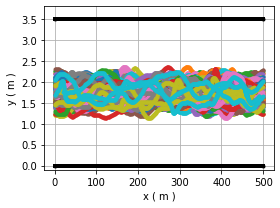

In [7]:
########################Plot
reload(CAF)
#
ax = road.plot_lanemarks_boundary(figsize = (4, 3), markcolor = 'y')
#fig,ax = plt.subplots(figsize = (10, 4), )
ax = CAF.SingleLaneSim.plot_sim_from_snapshots(snapshots = road.snapshots, \
           figsize = (7, 7),  ax = ax, alpha = 1, )
ax.set_ylim([-.1, 3.8])

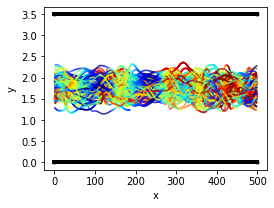

In [8]:
########################Plot
reload(CAF)
#
ax = road.plot_lanemarks_boundary(figsize = (4, 3), markcolor = 'y')
#fig,ax = plt.subplots(figsize = (10, 4), )
ax = CAF.SingleLaneSim.plot_twodim_trajectories_givensnapshots_singlelane(snapshots = road.snapshots, \
           figsize = (7, 7), length = 500, ax = ax, alpha = 1, cmap = 'jet_r', N_plotted = 1e10)
#ax.set_xlim([10,  100]);
#ax.set_ylim([ -.1,  3.6]);ax.grid()
#plt.tight_layout();plt.savefig(figspath + 'Lane_twodim_trajectories_TMP.jpg', dpi = 600)

(0.0, 500.0)

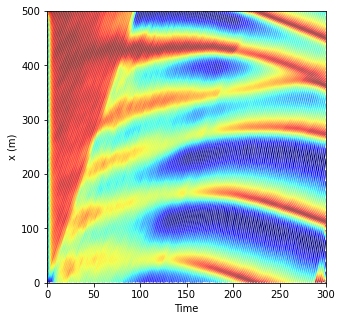

In [9]:
reload(CAF)
ax = CAF.SingleLaneSim.plot_speed_profile_singlelane_trajectories(road.snapshots, road.length, \
            figsize = (5, 5), cmap = 'jet_r', alpha = 1.0)
ax.set_xlim([0, 300])
ax.set_ylim([0, road.length])
#plt.tight_layout();plt.savefig(figspath + 'SingleLaneSimulationHeatmap.png', dpi = 600)

In [10]:
reload(CAF)
Q,V,K = CAF.TwoDimMicroModel.Get_QVK_from_snapshots_singlelane(road.snapshots, 500)

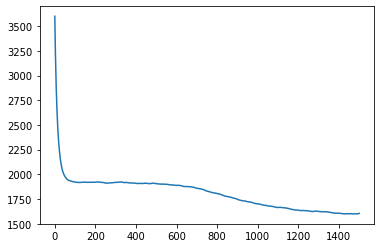

In [11]:
plt.plot(Q)

## two dim simulation

### two lanes simulation

In [12]:
reload(CAF)
"""
two_dim_paras = {'alpha_roadbounds': 1. , 'beta_lane_marks':3.6, 'beta_lane_middle_line': .56, \
    'sigma_long':.1, 'sigma_lat':.1, 'sigma_long_drift':1.0, 'sigma_lat_drift':1.0, 'theta_ou':.1, \
            'amplyfier_bound': 1.0, 'amplyfier_lane_mark': 1.0,  'amplyfier_intra_lanes_long': 1e-6, 'amplyfier_intra_lanes_lat':1e-7}
two_dim_paras = {'alpha_roadbounds': 1. , 'beta_lane_marks':3.6, 'beta_lane_middle_line': .56, \
    'sigma_long':.1, 'sigma_lat':.1, 'sigma_long_drift':1.0, 'sigma_lat_drift':1.0, 'theta_ou':.1, \
            'amplyfier_bound': 1.0, 'amplyfier_lane_mark': 1.0,  'amplyfier_intra_lanes_long': 1e-6, 'amplyfier_intra_lanes_lat':1e-7}      
"""
two_dim_paras = {'alpha_roadbounds': .1 , 'beta_lane_marks':3.6, 'beta_lane_middle_line': .56, \
    'sigma_long':.1, 'sigma_lat':.1, 'sigma_long_drift':1.0, 'sigma_lat_drift':1.0, 'theta_ou':.1, \
            'amplyfier_bound': 1.0, 'amplyfier_lane_mark': 1.0,  'amplyfier_intra_lanes_long': 1e-6, 'amplyfier_intra_lanes_lat':1e-9}
#
multilaneroad = CAF.MultiLaneHomogeneousPeriodSim(length = 500, lanes_ids = [0, 1,], lws = [3.6, 3.6], )
states = multilaneroad.sim_insert_vehs_at_once(T_horizon_sec= 2000, deltat_sec = .5, desired_density = 40, \
    stochastic_proecess_name = 'OU', two_dim_paras = two_dim_paras, with_neighboring_influence = True)
self = multilaneroad

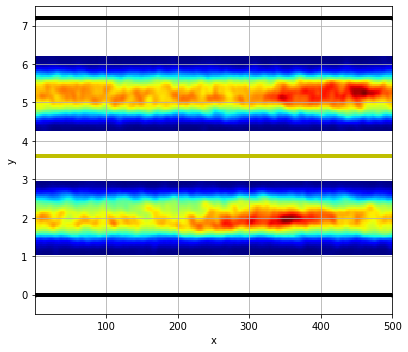

In [13]:
reload(CAF)
#
ax = multilaneroad.plot_lanemarks_boundary(figsize = (6,5))
#
ax = CAF.TwoDimMicroModel.plot_sim_heatmap_from_snapshot(multilaneroad.snapshots, ax =ax, idx_y = 2, \
    sigma= 2, alpha = .4,bins_x = 300, bins_y = 40,)
ax.set_ylim([-.5, 7.5])
ax.grid('on')
#ax.set_xlim([0, 500])

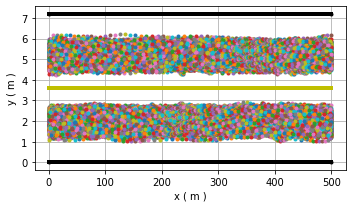

In [14]:
reload(CAF)
#
ax = multilaneroad.plot_lanemarks_boundary()
#
ax = CAF.TwoDimMicroModel.plot_sim_scatter(states, ax =ax)
#ax.set_ylim([0, 20])

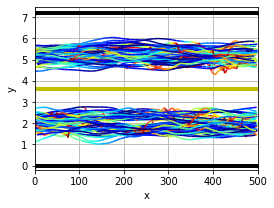

In [15]:
########################Plot
reload(CAF)
#
ax = multilaneroad.plot_lanemarks_boundary(figsize = (4, 3),)
ax = CAF.MultiLaneHomogeneousSim.plot_twodim_trajectories_givensnapshots_singlelane(snapshots = multilaneroad.snapshots, \
            laneid = 0, figsize = (7, 7), length = self.length, ax = ax, alpha = 1, cmap = 'jet_r', N_plotted = 50)
ax = CAF.MultiLaneHomogeneousSim.plot_twodim_trajectories_givensnapshots_singlelane(snapshots = multilaneroad.snapshots, \
            laneid = 1, figsize = (7, 7), length = self.length, ax = ax, alpha = 1, cmap = 'jet_r', N_plotted = 50)
ax.set_xlim([0,500]);ax.set_ylim([-.2,7.5]);
ax.grid('on');
#ax.set_xlim([0,200]);ax.set_ylim([0,500]);
#plt.tight_layout();plt.savefig(figspath + 'success_two_lanes_example.jpg', dpi = 600)

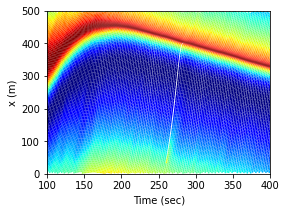

In [16]:
########################Plot
reload(CAF)
#
fig,ax = plt.subplots(figsize = (4, 3))
ax = CAF.MultiLaneHomogeneousSim.plot_speed_profile_singlelane_trajectories(snapshots = multilaneroad.snapshots, \
            laneid = 0, figsize = (7, 7), length = self.length, ax = ax, alpha = 1, cmap = 'jet_r')
ax.set_xlim([100,400]);ax.set_ylim([0,500]);
#plt.tight_layout();plt.savefig(figspath + 'success_two_lanes_example2.jpg', dpi = 600)

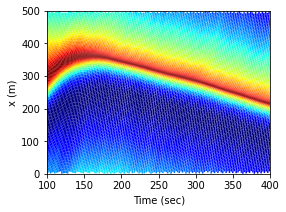

In [17]:
########################Plot
reload(CAF)
#
fig,ax = plt.subplots(figsize = (4, 3))
ax = CAF.MultiLaneHomogeneousSim.plot_speed_profile_singlelane_trajectories(snapshots = multilaneroad.snapshots, \
            laneid = 1, figsize = (7, 7), length = self.length, ax = ax, alpha = 1, cmap = 'jet_r')
ax.set_xlim([100,400]);ax.set_ylim([0,500]);
#plt.tight_layout();plt.savefig(figspath + 'success_two_lanes_example3.jpg', dpi = 600)

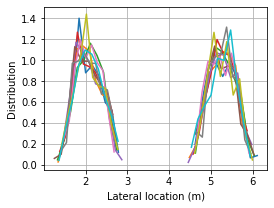

In [18]:
########################Plot
reload(CAF)
selected_marginal_xs = np.linspace(100, 400, 10)
lateraldistribution,stds,ax = CAF.MultiLaneSim.LateralDistribution_multilane(snapshots = multilaneroad.snapshots, \
        length = multilaneroad.length, selected_marginal_xs = selected_marginal_xs, plott = True, bins = 10, figsize = (4, 3))
#
ax.grid('on');
#plt.tight_layout();plt.savefig(figspath + 'success_two_lanes_example4.jpg', dpi = 600)

In [19]:
#fig,ax = plt.subplots()
for land_id in stds.keys():
    print(np.mean([stds[land_id][x] for x in stds[land_id].keys()]))
#
ax.grid('on')
#plt.tight_layout();plt.savefig(figspath + 'success_two_lanes_example5.jpg', dpi = 600)

0.3214991784117416
0.317741976652953


**Simulation**

In [277]:
reload(CAF)
"""
two_dim_paras = {'alpha_roadbounds': 1. , 'beta_lane_marks':3.6, 'beta_lane_middle_line': .56, \
    'sigma_long':.1, 'sigma_lat':.1, 'sigma_long_drift':1.0, 'sigma_lat_drift':1.0, 'theta_ou':.1, \
            'amplyfier_bound': 1.0, 'amplyfier_lane_mark': 1.0,  'amplyfier_intra_lanes_long': 1e-6, 'amplyfier_intra_lanes_lat':1e-7}
two_dim_paras = {'alpha_roadbounds': 1. , 'beta_lane_marks':3.6, 'beta_lane_middle_line': .56, \
    'sigma_long':.1, 'sigma_lat':.1, 'sigma_long_drift':1.0, 'sigma_lat_drift':1.0, 'theta_ou':.1, \
            'amplyfier_bound': 1.0, 'amplyfier_lane_mark': 1.0,  'amplyfier_intra_lanes_long': 1e-6, 'amplyfier_intra_lanes_lat':1e-7}      
"""
two_dim_paras = {'alpha_roadbounds': .05 , 'beta_lane_marks':3.6, 'beta_lane_middle_line': .56, \
    'sigma_long':.1, 'sigma_lat':.1, 'sigma_long_drift':1.0, 'sigma_lat_drift':1.0, 'theta_ou':.1, \
            'amplyfier_bound': 1.0, 'amplyfier_lane_mark': 1.0,  'amplyfier_intra_lanes_long': 1e-6, 'amplyfier_intra_lanes_lat':1e-9}
#

multilaneroad = CAF.MultiLaneHomogeneousPeriodSim(length = 500, lanes_ids = [0, 1, 2, 3], lws = [3.5, 3.5, 3.5, 3.5], )
states = multilaneroad.sim_insert_vehs_at_once(T_horizon_sec= 400, deltat_sec = .5, desired_density = 40, \
    stochastic_proecess_name = 'OU', two_dim_paras = two_dim_paras, with_neighboring_influence = True)
self = multilaneroad

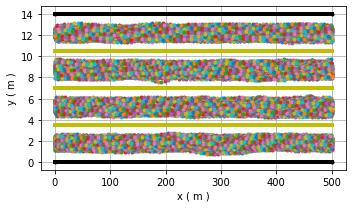

In [278]:
reload(CAF)
#
ax = multilaneroad.plot_lanemarks_boundary()
#
ax = CAF.TwoDimMicroModel.plot_sim_scatter(states, ax =ax)
#ax.set_ylim([0, 20])

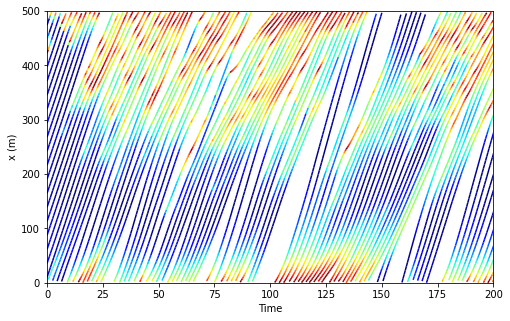

In [279]:
########################Plot
reload(CAF)
#
fig,ax = plt.subplots(figsize = (8, 5))
ax = CAF.MultiLaneHomogeneousSim.plot_speed_profile_singlelane_trajectories(snapshots = multilaneroad.snapshots, \
            laneid = 3, figsize = (7, 7), length = self.length, ax = ax, alpha = 1, cmap = 'jet_r')
#ax = CAF.MultiLaneHomogeneousSim.plot_speed_profile_singlelane_trajectories(snapshots = multilaneroad.snapshots, \
#            laneid = 1, figsize = (7, 7), length = self.length, ax = ax, alpha = 1, cmap = 'Greys')
#
#ax.grid();
ax.set_xlim([0,200]);ax.set_ylim([0,500]);
#plt.savefig(figspath + 'single_lane_longitudinal_trajectories.jpg', dpi = 1000)

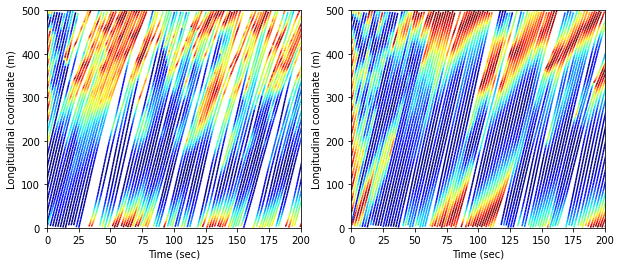

In [183]:
########################Plot
reload(CAF)
#
fig,axs = plt.subplots(figsize = (10, 4), ncols = 2, nrows = 1)
ax = axs[0]
ax = CAF.MultiLaneHomogeneousSim.plot_trajectory_profile_singlelane(snapshots = multilaneroad.snapshots, \
            laneid = 3, figsize = (7, 7), length = self.length, ax = ax, alpha = 1, cmap = 'jet_r')
ax.set_xlim([0,200]);ax.set_ylim([0,500]);
ax = axs[1]
ax = CAF.MultiLaneHomogeneousSim.plot_trajectory_profile_singlelane(snapshots = multilaneroad.snapshots, \
            laneid = 1, figsize = (7, 7), length = self.length, ax = ax, alpha = 1, cmap = 'jet_r')
#
#ax.grid();
ax.set_xlim([0,200]);ax.set_ylim([0,500]);
#plt.tight_layout();plt.savefig(figspath + 'FourLanes_trajectories.jpg', dpi = 600)

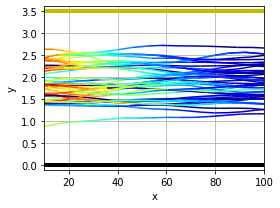

In [185]:
########################Plot
reload(CAF)
#
ax = multilaneroad.plot_lanemarks_boundary(figsize = (4, 3), markcolor = 'y')
#fig,ax = plt.subplots(figsize = (10, 4), )
ax = CAF.MultiLaneHomogeneousSim.plot_twodim_trajectories_givensnapshots_singlelane(snapshots = multilaneroad.snapshots, \
            laneid = 3, figsize = (7, 7), length = self.length, ax = ax, alpha = 1, cmap = 'jet_r', N_plotted = 50)
ax.set_xlim([10,  100]);ax.set_ylim([ -.1,  3.6]);ax.grid()
#plt.tight_layout();plt.savefig(figspath + 'success_Lane_twodim_trajectories_TMP.jpg', dpi = 600)

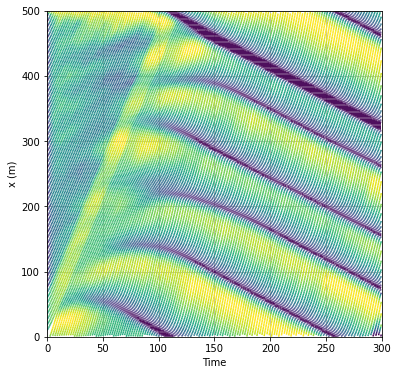

In [519]:
########################Plot
reload(twodim);reload(CAF)
#
#fig,ax = plt.subplots(figsize = (6, 6))
ax = CAF.MultiLaneHomogeneousSim.plot_speed_profile_singlelane_trajectories(snapshots = self.snapshots, \
            laneid = 0, figsize = (6, 6), length = self.length, ax = False)
#
ax.set_xlim([0,300]);ax.set_ylim([0,500]);
ax.grid()

### scatter and heatmap

(0.0, 20.0)

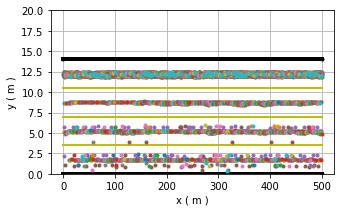

In [71]:
reload(CAF)
#
ax = multilaneroad.plot_lanemarks_boundary()
#
ax = CAF.TwoDimMicroModel.plot_sim_scatter(states, ax =ax)
ax.set_ylim([0, 20])

(0.0, 15.0)

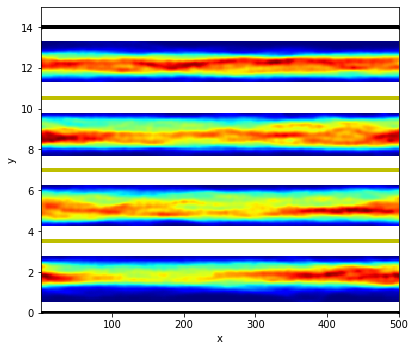

In [187]:
reload(CAF)
#
ax = multilaneroad.plot_lanemarks_boundary(figsize = (6,5))
#
ax = CAF.TwoDimMicroModel.plot_sim_heatmap_from_snapshot(multilaneroad.snapshots, ax =ax, idx_y = 2, \
    sigma= 2, alpha = .4,bins_x = 300, bins_y = 40,)
ax.set_ylim([0, 15])
#ax.set_xlim([0, 500])

### mixed AVs flow

In [20]:
reload(CAF)
"""
two_dim_paras = {'alpha_roadbounds':.1, 'beta_lane_marks':3.6, 'beta_lane_middle_line':.56, 'sigma_long':.1, \
                 'sigma_lat':.1, 'sigma_long_drift':1.0, 'sigma_lat_drift':1.0, 'gamma_middle_line':1.0}
"""
two_dim_paras = {'alpha_roadbounds': 1. , 'beta_lane_marks':3.6, 'beta_lane_middle_line': .56, \
    'sigma_long':.1, 'sigma_lat':.1, 'sigma_long_drift':1.0, 'sigma_lat_drift':1.0, 'theta_ou':.1, \
            'amplyfier_bound': 1.0, 'amplyfier_lane_mark': 1.0,  'amplyfier_intra_lanes_long': 1e-6, 'amplyfier_intra_lanes_lat':1e-7}
two_dim_paras_AV = {'alpha_roadbounds': .1, 'beta_lane_marks':3.6, 'beta_lane_middle_line':.56, \
    'sigma_long':.1, 'sigma_lat':.0002, 'sigma_long_drift':1.0, 'sigma_lat_drift':1.0, \
    'gamma_middle_line':2.0, 'theta_ou':.1, 'amplyfier_bound': 1.0, 'amplyfier_lane_mark': 1.0, \
    'amplyfier_intra_lanes_long': 1e-6, 'amplyfier_intra_lanes_lat':1e-7}
#
#

multilaneroad = CAF.MultiLaneHomogeneousPeriodSim(length = 500, lanes_ids = [0, 1, 2, 3], lws = [3.5, 3.5, 3.5, 3.5], )
#
states = multilaneroad.sim_insert_vehs_at_once_MIXED_AVS(T_horizon_sec= 300, deltat_sec = .5, desired_density = 120, \
    stochastic_proecess_name = 'OU', two_dim_paras_HDV = two_dim_paras,  two_dim_paras_AV = two_dim_paras_AV, \
    with_neighboring_influence = True)
#
self = multilaneroad

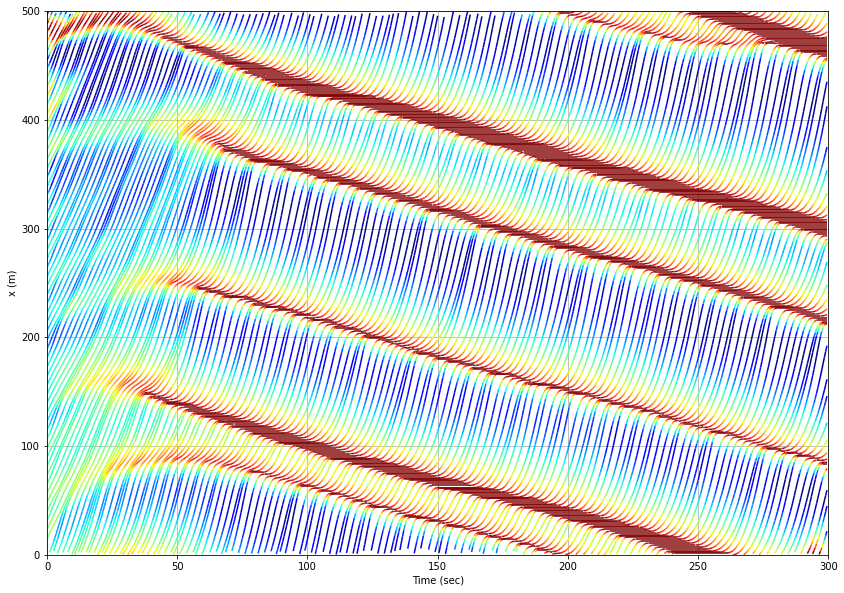

In [22]:
########################Plot
reload(CAF)
#
#fig,ax = plt.subplots(figsize = (6, 6))
ax = CAF.MultiLaneHomogeneousSim.plot_speed_profile_singlelane_trajectories(snapshots = self.snapshots, \
            laneid = 1, figsize = (14, 10), length = self.length, ax = False, alpha = 1.0, cmap = 'jet_r')
#
#ax = CAF.MultiLaneHomogeneousSim.plot_speed_profile_singlelane_trajectories(snapshots = self.snapshots, \
#            laneid = 1, figsize = (6, 6), length = self.length, ax = ax, alpha = .7, cmap = 'CMRmap')
#
ax.set_xlim([0,300]);ax.set_ylim([0,500]);
ax.grid()
#plt.savefig(figspath + 'single_lane_longitudinal_trajectories.jpg', dpi = 1000)

### Lane wise different density

In [22]:
T_horizon_sec = 500.0
length = 500.0
deltat_sec = 0.5
#
desired_densities_AV = 80
desired_densities = np.linspace(20, 120, 3)
#MPRs_list = [.1, .3, .4, .5]
lws_cases = ([3.5, 3.5, 3.5, 3.5], [2.8, 3.7, 3.7, 3.8], [3.7, 2.8, 3.7, 3.8])
##if the lane is DL, then the corresponding value is 1
DL_assignments = ([0, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0])
#
MPRS_cases = ([.0, .0, .0, .0], [1.0, .0, .0, .0], [.0, 1.0, .0, .0])#[.0, .2, .4, .6, .8, 1.0]
#RES_FD_dedicatedlane[cases_label][desired_density] = (Q,V,K), Q[laneid] is a list. 
RES_FD_dedicatedlane = {}

lanesnumber = 4
desireddensities = [120.0, 80.0, 120.0, 120.0]

In [23]:
reload(CAF)
#-------------------------
two_dim_paras ={'alpha_roadbounds': .1 , 'beta_lane_marks':3.6, 'beta_lane_middle_line': .56, \
    'sigma_long':.1, 'sigma_lat':.1, 'sigma_long_drift':1.0, 'sigma_lat_drift':1.0, 'theta_ou':.1, \
            'amplyfier_bound': 1.0, 'amplyfier_lane_mark': 1.0,  'amplyfier_intra_lanes_long': 1e-6, 'amplyfier_intra_lanes_lat':1e-9}
two_dim_paras_AV ={'alpha_roadbounds': .1 , 'beta_lane_marks':3.6, 'beta_lane_middle_line': .56, \
    'sigma_long':.1, 'sigma_lat':.00001, 'sigma_long_drift':1.0, 'sigma_lat_drift':1.0, 'theta_ou':.1, \
            'amplyfier_bound': 1.0, 'amplyfier_lane_mark': 1.0,  'amplyfier_intra_lanes_long': 1e-6, 'amplyfier_intra_lanes_lat':1e-9}

two_dim_paras = {'alpha_roadbounds': .1 , 'beta_lane_marks':3.6, 'beta_lane_middle_line': .56, \
    'sigma_long':.1, 'sigma_lat':.1, 'sigma_long_drift':1.0, 'sigma_lat_drift':1.0, 'theta_ou':.1, \
            'amplyfier_bound': 1.0, 'amplyfier_lane_mark': 1.0,  'amplyfier_intra_lanes_long': 1e-6, 'amplyfier_intra_lanes_lat':1e-9}
two_dim_paras_AV = {'alpha_roadbounds': .1, 'beta_lane_marks':3.6, 'beta_lane_middle_line':.56, \
    'sigma_long':.001, 'sigma_lat':.01, 'sigma_long_drift':1.0, 'sigma_lat_drift':1.0, \
    'gamma_middle_line':2.0, 'theta_ou':.1, 'amplyfier_bound': 1.0, 'amplyfier_lane_mark': 1.0, \
    'amplyfier_intra_lanes_long': 1e-6, 'amplyfier_intra_lanes_lat':1e-7}

idm_paras = {'idm_vf':120.0/3.6, 'idm_T':1.5, 'idm_delta':4.0, 'idm_s0':2.0, 'idm_a':1.0, 'idm_b':3.21, 'a_MAX':3.5, 'veh_len':5}
idm_paras_AV = {'idm_vf':120.0/3.6, 'idm_T':.8, 'idm_delta':4.0, 'idm_s0':2.0, 'idm_a':1.0, 'idm_b':3.21, 'a_MAX':3.5, 'veh_len':5}
#
multilaneroad = CAF.MultiLaneHomogeneousPeriodSim(length = 500, lanes_ids = [0, 1, 2, 3], lws = [3.54, 3.54, 3.5, 3.5], )
#
states = multilaneroad.sim_insert_vehs_at_once_MIXED_AVS_lanewise_desiredensiy(T_horizon_sec= 300, deltat_sec = .5, \
    desireddensities = desireddensities, \
    stochastic_proecess_name = 'OU', \
    two_dim_paras_HDV = two_dim_paras,  two_dim_paras_AV = two_dim_paras_AV, \
    with_neighboring_influence = True, idm_paras_AV = idm_paras_AV, idm_paras_HDV = idm_paras, )
#

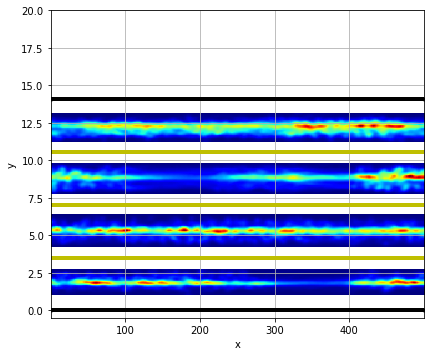

In [24]:
reload(CAF)
#
ax = multilaneroad.plot_lanemarks_boundary(figsize = (6,5))
#
ax = CAF.TwoDimMicroModel.plot_sim_heatmap_from_snapshot(multilaneroad.snapshots, ax =ax, idx_y = 2, \
    sigma= 2, alpha = .4,bins_x = 300, bins_y = 40,)
ax.set_ylim([-.5, 20])
ax.grid('on')
#ax.set_xlim([0, 500])